<a href="https://colab.research.google.com/github/MemonML/datascience_bootcamp/blob/main/day11_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polinomial Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

# Loading Data set

In [ ]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Data Science Boot Camp/week2/day_9/data_sets/Advertising.csv")

# Looking into the dataset

In [ ]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
data.shape

(200, 5)

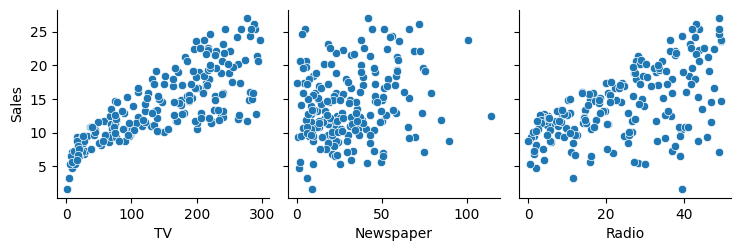

In [ ]:
#scatter plots of each colomn (X) against sales (Y) using seaborn
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales')
plt.show()

# Dataset preperation for the Polinomial regression modeling

In [ ]:
X=data['TV'].values.reshape(-1,1)
Y=data['Sales'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=100)

# Polynomial regression curve fitting

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_f = PolynomialFeatures(degree=2)
X_train_poly = poly_f.fit_transform(X_train)
X_test_poly = poly_f.fit_transform(X_test)
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, y_train)
predicted = pol_reg.predict(X_test_poly)

# Evaluation on training data X with pridicted

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE=mean_absolute_error(y_test, predicted)
mse = mean_squared_error(y_test, predicted)
print(MAE, mse)

2.163208954159491 7.699679306094484


# Plotting

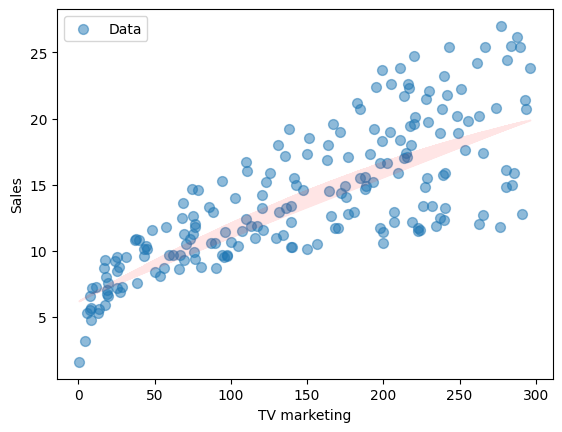

In [ ]:
# Visualize the data and the linear regression line
plt.scatter(X, Y, s=50, alpha=0.5, label='Data')
plt.plot(X_train, pol_reg.predict(X_train_poly), color='red', alpha=0.1)
plt.xlabel('TV marketing')
plt.ylabel('Sales')
plt.legend()
plt.show()